In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import squarify

from helpers import fetch_area_data, get_children_codes, get_variables
from tree import Tree
from config import settings

In [2]:
print('51163 Rockbridge County, Virginia')
df = fetch_area_data('2021','a','51163')

51163 Rockbridge County, Virginia


In [3]:
# https://www.bls.gov/cew/classifications/aggregation/agg-level-titles.htm
print(f"Total establishments in the county: {int(df[df['agglvl_code']==70]['annual_avg_estabs'])}") 
aggregations = range(74,78+1)
for aggregation in aggregations:
    print(f"The sum of establishment counts at level {aggregation}: {np.sum(df[df['agglvl_code']==aggregation]['annual_avg_estabs'])}")

Total establishments in the county: 533
The sum of establishment counts at level 74: 533
The sum of establishment counts at level 75: 536
The sum of establishment counts at level 76: 539
The sum of establishment counts at level 77: 541
The sum of establishment counts at level 78: 540


In [9]:
# cast data into a tree structure with nested mappings
# county = {'ind': 10, 'estabs': 533, 'empl': 5937, children': [{}, {}, ...]}

# root
where = (df['industry_code']=='10') & (df['agglvl_code']==70)
estabs = df[where]['annual_avg_estabs'].values[0]
empl = df[where]['annual_avg_emplvl'].values[0]
county = Tree('10', estabs, empl, [])

# 74 (demo)
aggregation = 74
codes = np.unique(sorted(list(df['industry_code'][df['agglvl_code']==aggregation])))
for code in codes:
    estabs, empl = get_variables(df, code)
    children_codes = get_children_codes(df, code, aggregation)
    county.children.append(Tree(code, estabs, empl, children_codes))


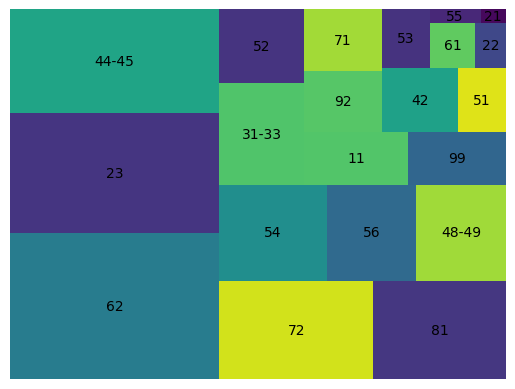

In [ ]:
inds = [county.children[i].ind for i,_ in enumerate(county.children)]
estabs = [county.children[i].estabs for i,_ in enumerate(county.children)]

inds_sorted = [ind for _, ind in sorted(zip(estabs, inds), reverse=True)]
estabs_sorted = sorted(estabs, reverse=True)
squarify.plot(sizes=estabs_sorted, label=inds_sorted)
plt.axis('off')
plt.show()